In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных¶

In [42]:
data = pd.read_csv('winemag-data-130k-v2.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [43]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [44]:
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

# Обработка пропусков в данных

In [45]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка price. Тип данных float64. Количество пустых значений 8996, 6.92%.


In [46]:
data.shape[0]

129971

In [47]:
data_null = data[data['price'].isnull()]
data_null.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte


In [48]:
data_null.shape[0]

8996

In [49]:
flt_index = data[data['price'].isnull()].index
flt_index

Int64Index([     0,     13,     30,     31,     32,     50,     54,     79,
               137,    159,
            ...
            129764, 129787, 129794, 129807, 129813, 129844, 129860, 129863,
            129893, 129964],
           dtype='int64', length=8996)

In [50]:
flt_index.shape[0]

8996

In [51]:
data1 = data.dropna(axis=0, how='any', subset = ['price', 'variety'])
(data.shape, data_new_2.shape)

((129971, 14), (120975, 12))

In [52]:
data1.isnull().sum()

Unnamed: 0                   0
country                     59
description                  0
designation              34778
points                       0
price                        0
province                    59
region_1                 19574
region_2                 70682
taster_name              24495
taster_twitter_handle    29415
title                        0
variety                      0
winery                       0
dtype: int64

Удаление некоторых описательных столбцов

In [53]:
del data1['description']

In [54]:
data1.shape

(120974, 13)

In [55]:
del data1['title']
data1.shape

(120974, 12)

# Обработка пропусков в категориальных данных

In [56]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 4)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка country. Тип данных object. Количество пустых значений 63, 0.0485%.
Колонка designation. Тип данных object. Количество пустых значений 37465, 28.8257%.
Колонка province. Тип данных object. Количество пустых значений 63, 0.0485%.
Колонка region_1. Тип данных object. Количество пустых значений 21247, 16.3475%.
Колонка region_2. Тип данных object. Количество пустых значений 79460, 61.1367%.
Колонка taster_name. Тип данных object. Количество пустых значений 26244, 20.1922%.
Колонка taster_twitter_handle. Тип данных object. Количество пустых значений 31213, 24.0154%.
Колонка variety. Тип данных object. Количество пустых значений 1, 0.0008%.


In [57]:
del data1['region_2']
data1.shape

(120974, 11)

In [58]:
del data1['taster_twitter_handle']
data1.shape

(120974, 10)

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder

In [60]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
le = LabelEncoder()

def impute(column):
    data_imp = imp2.fit_transform(data1[[column]])
    c1 = pd.DataFrame({'c1':data_imp.T[0]})
    le.fit(c1.c1)
    name_col = column + '_le'
    data1[name_col]=le.transform(c1.c1)
    return data1.head(2)

In [61]:
impute('country')

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39


In [62]:
impute('designation')

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le,designation_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30,2218
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39,26154


In [63]:
impute('province')

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le,designation_le,province_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30,2218,107
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39,26154,266


In [64]:
impute('region_1')

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le,designation_le,province_le,region_1_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30,2218,107,729
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39,26154,266,1192


In [65]:
impute('taster_name')

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le,designation_le,province_le,region_1_le,taster_name_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30,2218,107,729,15
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39,26154,266,1192,14


In [66]:
impute('winery')

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le,designation_le,province_le,region_1_le,taster_name_le,winery_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30,2218,107,729,15,12196
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39,26154,266,1192,14,12256


In [69]:
data2.shape

(120974, 16)

In [70]:
impute('variety')

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le,designation_le,province_le,region_1_le,taster_name_le,winery_le,variety_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30,2218,107,729,15,12196,445
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39,26154,266,1192,14,12256,431


In [71]:
data1.isnull().sum()

Unnamed: 0            0
country              59
designation       34778
points                0
price                 0
province             59
region_1          19574
taster_name       24495
variety               0
winery                0
country_le            0
designation_le        0
province_le           0
region_1_le           0
taster_name_le        0
winery_le             0
variety_le            0
dtype: int64

In [72]:
data2 = data1
data2.head(2)

,Unnamed: 0,country,designation,points,price,province,region_1,taster_name,variety,winery,country_le,designation_le,province_le,region_1_le,taster_name_le,winery_le,variety_le
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,30,2218,107,729,15,12196,445
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,39,26154,266,1192,14,12256,431


In [78]:
del data2['designation']
del data2['province']
del data2['region_1']
del data2['country']
del data2['variety']
del data2['winery']
del data2['taster_name']

In [79]:
data2.head(2)

,Unnamed: 0,points,price,country_le,designation_le,province_le,region_1_le,taster_name_le,winery_le,variety_le
1,1,87,15.0,30,2218,107,729,15,12196,445
2,2,87,14.0,39,26154,266,1192,14,12256,431


In [80]:
data2.to_csv('good_wine.csv')

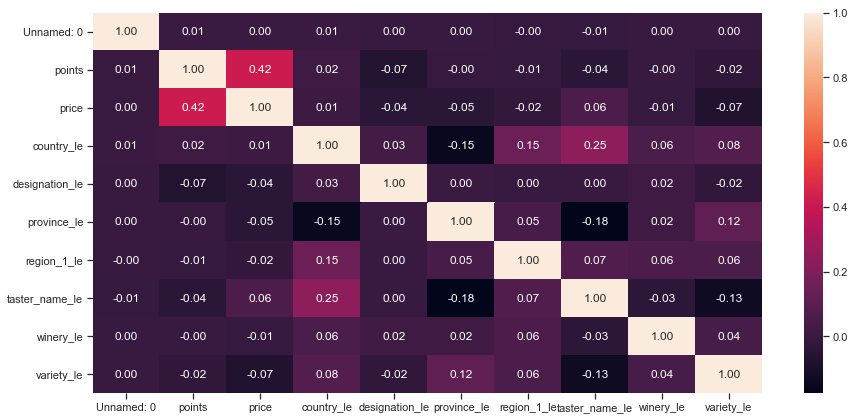

In [81]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')